# kNN intro

Basic steps:

1. calculate Eclidean distance
2. Get nearest neighbors
3. make predications

To demonstrate, we use iris dataset.

In [11]:
import numpy as np
import pandas as pd
from IPython.display import display

# Load and process Iris dataset

This is to demonstrate that with pandas, we can read file directly over the network. Iris dataset have 4 features, 3 classes. Each class have 50 instances.


In [5]:
import pandas as pd

# columns names - can be used to access columns later
columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"]

# iris.data is a csv file
src = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load the file with pandas.read_csv
# it will name columns as defined in columns list
# so one can access a column through index or name
iris_data = pd.read_csv(src, header=None, names=columns)

In [4]:
iris_data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Separate Features and Labels

We need first 4 columns as features, the last column to be labels. But we can't use `iris_data[:, :4]` directly.
pandas iloc allows us to access data through indices:

In [6]:
X = iris_data.iloc[:, :4]
Y = iris_data.iloc[:, -1]
display(X)
display(Y)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object

## Split Training and Test dataset

* First, we do 80-20 split to have training data and test data.
* Then, we do another 80-20 split on training data to have training data and validation data.


In [78]:
from sklearn.model_selection import train_test_split as split

Y = Y.astype("category")

# train_test_split: Split arrays or matrices into random train and test subsets
X_train, X_test, Y_train, Y_test = split(X, Y, test_size=0.2)

# let's use 20% of training samples for validation
X_train, X_valid, Y_train, Y_valid = split(X_train, Y_train, test_size=0.2)

# check how many sample we have
print(X_train.shape[0], X_valid.shape[0], X_test.shape[0])

96 24 30


In [79]:
# we can access the numeric value from category
X_train, Y_train

(     Sepal Length  Sepal Width  Petal Length  Petal Width
 145           6.7          3.0           5.2          2.3
 33            5.5          4.2           1.4          0.2
 62            6.0          2.2           4.0          1.0
 106           4.9          2.5           4.5          1.7
 44            5.1          3.8           1.9          0.4
 ..            ...          ...           ...          ...
 78            6.0          2.9           4.5          1.5
 136           6.3          3.4           5.6          2.4
 77            6.7          3.0           5.0          1.7
 132           6.4          2.8           5.6          2.2
 111           6.4          2.7           5.3          1.9
 
 [96 rows x 4 columns],
 145     Iris-virginica
 33         Iris-setosa
 62     Iris-versicolor
 106     Iris-virginica
 44         Iris-setosa
             ...       
 78     Iris-versicolor
 136     Iris-virginica
 77     Iris-versicolor
 132     Iris-virginica
 111     Iris-virginica
 N

# Implment kNN using just numpy

Previously, we leaverage pandas and sklearn to split to store and split the dataset.
Now that we want to constraint ourselves to numpy, we must convert pandas dataframe to numpy array.



In [134]:
X_np_train = X_train.to_numpy()
Y_np_train = Y_train.cat.codes.to_numpy() # use category codes instead
X_np_test = X_test.to_numpy()
Y_np_test = Y_test.cat.codes.to_numpy()
X_np_valid = X_valid.to_numpy()
Y_np_valid = Y_valid.cat.codes.to_numpy()

In [86]:
Y_np_train

array([2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 1, 0,
       2, 0, 2, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 1, 1, 1,
       0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 2], dtype=int8)

In [106]:
import numpy as np


def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2, axis=1))

def predict_a(x_train, y_train, x_test, k):
    """ Predict a single test sample.
    return is a class label 0, 1, 2 ... pending on how many classes the dataset has.
    For Iris dataset, there are a total of 3 classes, so the return value (0, 1, 2)
    """
    # number of classes
    nof_classes = np.amax(y_train) + 1
    
    # placeholder for votes
    votes = np.zeros(nof_classes, dtype=np.int)

    # Here, if x_train has 100 instances,
    # distances will return 100 values, each represents
    # the distance from x_test to each instance.
    distances = euclidean_dist(x_test, x_train)

    # find k closet neighbors and vote
    # argsort returns the indices that would sort an array
    # so indices of nearest neighbors
    for neighbor_id in np.argsort(distances)[:k]:
        # this is a label corresponding to one of the closest neighbor
        neighbor_label = y_train[neighbor_id]
        # which updates votes array
        votes[neighbor_label] += 1

    # predicted label is the one with most votes
    # the index reprsents the class label
    return np.argmax(votes) 


def predict(x_train, y_train, x_test_data, k):
    """ Simple extension to predict on an array of test data 
    the return is array of class labels, correspondingly
    """
    # placeholder for predictions
    predictions = []

    for x_test in x_test_data:
        pred_label = predict_a(x_train, y_train, x_test, k)
        predictions.append(pred_label)

    return predictions

In [108]:
preds = predict(X_np_train, Y_np_train, X_np_test, 3)

## Accuracy

Let's write our own accuracy check.
So, for $k=3$, we got just one wrong, among a total of 30 test samples

In [117]:
np.array(preds)

array([0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 2, 0, 1,
       0, 2, 2, 1, 0, 1, 0, 1])

In [109]:
Y_np_test

array([0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 2, 0, 1,
       0, 1, 2, 1, 0, 1, 0, 1], dtype=int8)

In [119]:
np.sum(Y_np_test == np.array(preds))/len(preds)

0.9666666666666667

# Using scikit-learn for kNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier
# create knn classifier with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
# train the model
knn.fit(X_np_train, Y_np_train)
# predict labels for test samples
Y_pred = knn.predict(X_np_test)

Y_pred

In [122]:
Y_pred == Y_np_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True])

Note that, using the same training dataset and test dataset (I didn't use validation dataset).
The results are exactly the same as the manual crafted one.

In [132]:
(Y_np_test == Y_pred).sum()/Y_np_test.shape[0]

### Using accuracy_score

0.9666666666666667

In [133]:

from sklearn.metrics import accuracy_score

print(accuracy_score(Y_np_test, Y_pred))


0.9666666666666667


# Analyze K

the idea is to use validation dataset to find the optimal $k$ to use.


In [136]:
scores = []  # placeholder for accuracy

max_k = 85  # maximum number of voters

# loop over different values of k
for k in range(1, max_k):
  # create knn classifier with k = k
  knn = KNeighborsClassifier(n_neighbors=k)

  # train the model
  knn.fit(X_np_train, Y_np_train)

  # predict labels for test samples
  Y_pred = knn.predict(X_np_valid)

  # add accuracy to score table
  scores.append(accuracy_score(Y_np_valid, Y_pred))

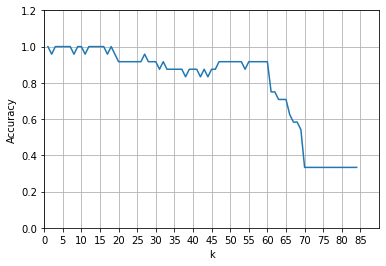

In [140]:
import matplotlib.pyplot as plt

def k_accuracy_plot(max_k=85):
  """Just plot settings"""
  plt.grid(True)
  plt.xlabel("k")
  plt.ylabel("Accuracy")
  plt.xlim([0, max_k + 5])
  plt.ylim([0, 1.2])
  plt.xticks(range(0, max_k + 5, 5))

  return plt

k_accuracy_plot().plot(range(1, max_k), scores);